In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Checkpoint 1: Data Cleaning 1

The encoding used is "palmos" that completely eliminated the problem of special characters.

In [2]:
#Read companies and rounds2 Data
companies = pd.read_csv('companies.csv',encoding ='palmos')
rounds2 = pd.read_csv('rounds2.csv',encoding='palmos')

In [3]:
#Taking a glimpse of the dataframes
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#Making observation on the column datatypes and null-count in both the data frames
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


### Table-1.1

1. How many unique companies are present in rounds2?
2. How many unique companies are present in the companies file?
3. In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [7]:
#Ensuring that the permalinks in both the dataframes are in lowercases to get the right unique counts
companies['permalink'] = companies['permalink'].apply(lambda x: str(x).lower())
rounds2['company_permalink']= rounds2['company_permalink'].apply(lambda x: str(x).lower())

In [8]:
companies['permalink'].nunique()

66368

In [9]:
rounds2['company_permalink'].nunique()

66368

In [10]:
#Checking for entries in rounds 2 which are not present in comapanies and vice versa
print('Number of rows from rounds2 where company_permalink is found in companies dataframe are: '
    +str(rounds2['company_permalink'].isin(companies['permalink']).astype(int).sum())+ ' out of '
      +str(rounds2['company_permalink'].count()))
print('Number of rows from companies where permalink is found in rounds2 dataframe are: '
     +str(companies['permalink'].isin(rounds2['company_permalink']).astype(int).sum())+ ' out of '
      +str(companies['permalink'].count()))

Number of rows from rounds2 where company_permalink is found in companies dataframe are: 114949 out of 114949
Number of rows from companies where permalink is found in rounds2 dataframe are: 66368 out of 66368


In [11]:
master_frame = pd.merge(companies,rounds2,how ='inner', left_on='permalink',right_on='company_permalink')

In [12]:
#Taking a glimpse of the master_frame
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
#Making an observation on the column types and null count in the master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [14]:
#dropping repeated column company_permalink which is the same as permalink
master_frame = master_frame.drop('company_permalink', axis = 1)

In [15]:
#looking at null_count in each column in percentage
(round(100*master_frame.isnull().sum()/len(master_frame),2)).sort_values(ascending=False)

funding_round_code         72.91
founded_at                 17.85
raised_amount_usd          17.39
state_code                  9.52
city                        8.84
region                      8.84
country_code                7.55
homepage_url                5.34
category_list               2.97
funded_at                   0.00
funding_round_type          0.00
funding_round_permalink     0.00
status                      0.00
name                        0.00
permalink                   0.00
dtype: float64

In [16]:
#Since the funding_round_code null values>50% we can get rid of that column
#Also columns like state_code, city, region, founded_at and homepage_url seem not required for current analysis
#Hence these can be removed safely
master_frame = master_frame.drop(['funding_round_code','founded_at','state_code','city','region','homepage_url'], axis = 1)

In [17]:
#looking at null_count in each column in percentage
(round(100*master_frame.isnull().sum()/len(master_frame),2)).sort_values(ascending=False)

raised_amount_usd          17.39
country_code                7.55
category_list               2.97
funded_at                   0.00
funding_round_type          0.00
funding_round_permalink     0.00
status                      0.00
name                        0.00
permalink                   0.00
dtype: float64

In [18]:
#Let's look at the raised_amount_usd column for a possible impute
pd.options.display.float_format = '{:.4f}'.format
master_frame['raised_amount_usd'].describe()

count         94959.0000
mean       10426869.3345
std       114821247.9849
min               0.0000
25%          322500.0000
50%         1680511.0000
75%         7000000.0000
max     21271935000.0000
Name: raised_amount_usd, dtype: float64

In [19]:
#Since we see that the mean and median vary by a factor of 10 (in millions) it is not safe to impute the values
#Instead let's get rid of the rows with null entries in raised_amount_usd
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

In [20]:
#looking at null_count in each column in percentage
(round(100*master_frame.isnull().sum()/len(master_frame),2)).sort_values(ascending=False)

country_code              6.1600
category_list             1.1000
raised_amount_usd         0.0000
funded_at                 0.0000
funding_round_type        0.0000
funding_round_permalink   0.0000
status                    0.0000
name                      0.0000
permalink                 0.0000
dtype: float64

In [21]:
#Let's analyze the county_code column 
100*(master_frame['country_code'].value_counts()/len(master_frame))

USA   65.3429
GBR    5.2854
CAN    2.7549
CHN    2.0293
IND    1.7365
        ...  
MKD    0.0011
UZB    0.0011
GRD    0.0011
OMN    0.0011
SEN    0.0011
Name: country_code, Length: 134, dtype: float64

In [22]:
#Either we can impute the country_code values with 'USA' as it is present in 65% of the entries
#Or get rid of the rows where the entries in country_code column is null
#Since it is only 6.16%(<10%) of the rows, getting rid of the rows is a fine choice to proceed with
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [23]:
#looking at null_count in each column in percentage
(round(100*master_frame.isnull().sum()/len(master_frame),2)).sort_values(ascending=False)

category_list             0.6500
raised_amount_usd         0.0000
funded_at                 0.0000
funding_round_type        0.0000
funding_round_permalink   0.0000
country_code              0.0000
status                    0.0000
name                      0.0000
permalink                 0.0000
dtype: float64

In [24]:
#Similarly getting rid of the null_count values in category_list is good option 
#As only 0.65%(<<10%) values are null
master_frame = master_frame[~master_frame['category_list'].isnull()]

#### Finally the data looks clean as is visible in the percentages below



In [25]:
#looking at null_count in each column in percentage
(round(100*master_frame.isnull().sum()/len(master_frame),2)).sort_values(ascending=False)

raised_amount_usd         0.0000
funded_at                 0.0000
funding_round_type        0.0000
funding_round_permalink   0.0000
country_code              0.0000
status                    0.0000
category_list             0.0000
name                      0.0000
permalink                 0.0000
dtype: float64

In [26]:
master_frame.reset_index(inplace = True, drop =True)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88529 entries, 0 to 88528
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.1+ MB


In [27]:
#percentage of data retained after cleaning (Note initial length of the frame was 114949 as can be found above)
print('Percentage of data retained after cleaning = '+str(100*(len(master_frame)/114949)))

Percentage of data retained after cleaning = 77.01589400516751


# Checkpoint 2: Funding Type Analysis

### Table-2.1
1. Average funding amount of venture type?
2. Average funding amount of angel type?
3. Average funding amount of seed type?
4. Average funding amount of private equity type?
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [28]:
#Taking a look at the various funding round types and their number on investments
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [29]:
#Filtering the type of funding to include only the type of interest ['venture','angel','seed','private_equity']
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

#For checkpoint 6 a copy of the master_frame with all the 4 funding_round_type has been stored
funding_type_frame = master_frame.copy()

In [30]:
master_frame['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

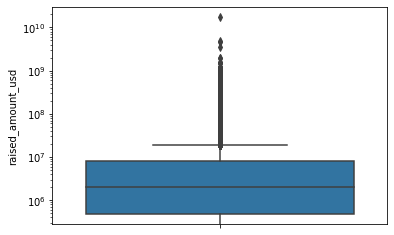

In [31]:
#Boxplot of raised_amount_usd
sns.boxplot(y='raised_amount_usd',data= master_frame)
plt.yscale('log')
plt.show()

#### We note from the above plot that there are many outliers on the higher range of values in the data

In [32]:
#For each of the funding_round_type an analysis of the raised_amount_usd is shown below
master_frame.groupby(by='funding_round_type',as_index = True).describe()['raised_amount_usd']

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0000,971573.8911,7710904.3326,0.0000,152756.5000,414906.0000,1000000.0000,494511992.0000
private_equity,1820.0000,73938486.2753,201776467.3801,0.0000,5000000.0000,20000000.0000,75762572.0000,4745460219.0000
seed,21095.0000,747793.6825,2288317.6379,0.0000,68816.5000,300000.0000,1000000.0000,200000000.0000
venture,47809.0000,11724222.6902,88215713.6149,0.0000,1600000.0000,5000000.0000,12000000.0000,17600000000.0000


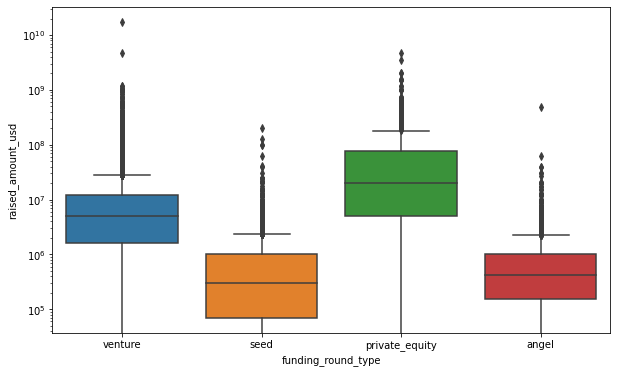

In [33]:
#To get better visual understanding of the above analysis of raised_amount_usd based on funding_round_type
#Let's see the boxplot of the same
plt.figure(figsize =[10,6])
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.yscale('log')
plt.show()

#### From both the plots it is clear that the median values are much better representation of the data because of the large number of outliers and hence the vast difference between mean and median

In [34]:
#Lets look at the median values based on the funding_round_type category again!
master_frame.groupby(by='funding_round_type',as_index = True)['raised_amount_usd'].median()

funding_round_type
angel              414906.0000
private_equity   20000000.0000
seed               300000.0000
venture           5000000.0000
Name: raised_amount_usd, dtype: float64

#### Hence it is clear that venture type is the funding type that is of interest as it falls in the range of 5-15 million USD

In [35]:
#Filtering out the venture type of investment
master_frame = master_frame[master_frame['funding_round_type']=='venture']

In [36]:
master_frame.reset_index(inplace = True, drop=True)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47809 non-null  object 
 1   name                     47809 non-null  object 
 2   category_list            47809 non-null  object 
 3   status                   47809 non-null  object 
 4   country_code             47809 non-null  object 
 5   funding_round_permalink  47809 non-null  object 
 6   funding_round_type       47809 non-null  object 
 7   funded_at                47809 non-null  object 
 8   raised_amount_usd        47809 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.3+ MB


# Checkpoint 3: Country Analysis

### Table-3.1
1. Top English speaking country?
2. Second English speaking country?
3. Third English speaking country?

(Ensure to code results for the top 9 countries)

In [37]:
top9 = master_frame.groupby('country_code',as_index= False)['raised_amount_usd'].sum().sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.head(9)
top9.reset_index(inplace = True, drop = True)
top9

,country_code,raised_amount_usd
0,USA,420068029342.0000
1,CHN,39338918773.0000
2,GBR,20072813004.0000
3,IND,14261508718.0000
4,CAN,9482217668.0000
5,FRA,7226851352.0000
6,ISR,6854350477.0000
7,DEU,6306921981.0000
8,JPN,3167647127.0000


#### Filtering out the top 3 English speaking countries 'USA', 'GBR' and 'IND'

In [38]:
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]
master_frame.reset_index(inplace=True, drop = True)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38803 entries, 0 to 38802
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.7+ MB


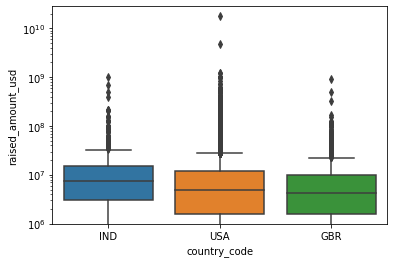

In [39]:
#Let's get a visual representation of the amount_raised_usd based on the countries before moving ahead
sns.boxplot(y='raised_amount_usd',x='country_code',data=master_frame)
plt.yscale('log')
plt.show()

# Checkpoint 4: Sector Analysis 1

In [40]:
mapping = pd.read_csv('mapping.csv')

In [41]:
#Observing data types and null value count in mapping dataframe
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [42]:
#Taking a glimpse of the mapping dataframe
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [43]:
#Getting rid of the row with null value in category_list of mapping dataframe
mapping = mapping[~mapping['category_list'].isnull()]

In [44]:
#Looking at null count as percentage of the number of rows in mapping dataframe.
(round(100*mapping.isnull().sum()/len(mapping),2)).sort_values(ascending=False)

Social, Finance, Analytics, Advertising   0.0000
Others                                    0.0000
News, Search and Messaging                0.0000
Manufacturing                             0.0000
Health                                    0.0000
Entertainment                             0.0000
Cleantech / Semiconductors                0.0000
Blanks                                    0.0000
Automotive & Sports                       0.0000
category_list                             0.0000
dtype: float64

In [45]:
#Converting the mapping dataframe from wide form to long form
mapping = pd.melt(mapping, id_vars=['category_list'],var_name='main_sector')
mapping = mapping[mapping['value']==1]

#Drop the value column
mapping = mapping.drop('value',axis = 1)
mapping.reset_index(inplace=True,drop=True)

#The category_list mapped to each of its respective main_sector is shown in the table below
mapping

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
682,Social Recruiting,"Social, Finance, Analytics, Advertising"
683,Social Television,"Social, Finance, Analytics, Advertising"
684,Social Travel,"Social, Finance, Analytics, Advertising"
685,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [46]:
#Primary Sector fetched and added in the master_frame using the category_list column
master_frame['primary_sector']=master_frame['category_list'].apply(lambda x: str(x)[:str(x).find('|')] if (str(x).find('|')!=-1) else x)

In [47]:
#We can drop the category_list column of the master_frame
master_frame = master_frame.drop('category_list',axis =1)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38803 entries, 0 to 38802
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   status                   38803 non-null  object 
 3   country_code             38803 non-null  object 
 4   funding_round_permalink  38803 non-null  object 
 5   funding_round_type       38803 non-null  object 
 6   funded_at                38803 non-null  object 
 7   raised_amount_usd        38803 non-null  float64
 8   primary_sector           38803 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.7+ MB


In [48]:
#Bringing the category_list and the primary_sector columns to lower case in both dataframes for matching
mapping['category_list'] = mapping['category_list'].apply(lambda x : str(x).lower())
master_frame['primary_sector'] = master_frame['primary_sector'].apply(lambda x : str(x).lower())

In [49]:
#Now let's look at the category from mapping dataframe not present in master_frame
mapping[~mapping['category_list'].isin(master_frame['primary_sector'])]['category_list'].value_counts()

can0bis                 1
business travelers      1
unmanned air systems    1
jewelry                 1
lifestyle products      1
                       ..
subscription service    1
handmade                1
lotteries               1
plumbers                1
casual games            1
Name: category_list, Length: 175, dtype: int64

In [50]:
#We observe that there are some typo errors visible

#Correcting the typo error of '0' in the category_list of mapping dataframe
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na'))

In [51]:
mapping[~mapping['category_list'].isin(master_frame['primary_sector'])]['category_list'].value_counts()
#No typo Errors visible

direct advertising             1
indians                        1
building owners                1
postal and courier services    1
virtual workforces             1
                              ..
promotional                    1
veterinary                     1
personal data                  1
realtors                       1
casual games                   1
Name: category_list, Length: 134, dtype: int64

In [52]:
#Let's do an inner join to merge the 2 dataframes and map the primary sector of each company to its main_sector
master_frame = pd.merge(master_frame,mapping,left_on='primary_sector',right_on='category_list',how='inner')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38788 non-null  object 
 1   name                     38788 non-null  object 
 2   status                   38788 non-null  object 
 3   country_code             38788 non-null  object 
 4   funding_round_permalink  38788 non-null  object 
 5   funding_round_type       38788 non-null  object 
 6   funded_at                38788 non-null  object 
 7   raised_amount_usd        38788 non-null  float64
 8   primary_sector           38788 non-null  object 
 9   category_list            38788 non-null  object 
 10  main_sector              38788 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


In [53]:
#We can now drop the category_list column as it is same as primary_sector
master_frame = master_frame.drop('category_list',axis =1)

#Lets looks the percentage of null values in the columns now
(100*(master_frame.isnull().sum()/len(master_frame))).sort_values(ascending=False)

main_sector               0.0000
primary_sector            0.0000
raised_amount_usd         0.0000
funded_at                 0.0000
funding_round_type        0.0000
funding_round_permalink   0.0000
country_code              0.0000
status                    0.0000
name                      0.0000
permalink                 0.0000
dtype: float64

#### We therefore have a clean and merged master_frame with mapping of the main_sector complete

# Checkpoint 5: Sector Analysis 2

### Table 5.1

(all questions below are to be answered country wise)

1. Total number of Investments (count)?
2. Total amount of investment (USD)?
3. Top Sector name (no. of investment-wise)?
4. Second Sector name (no. of investment-wise)?
5. Third Sector name (no. of investment-wise)?
6. Number of investments in top sector (3)?
7. Number of investments in second sector (4)?
8. Number of investments in third sector (5)?
9. For point 3 (top sector count-wise), which company received the highest investment?
10. For point 4 (second best sector count-wise), which company received the highest investment?

In [54]:
#filter_out the investments in the range of 5-15 million USD
master_frame = master_frame[((master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000))]

In [55]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 0 to 38781
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                13012 non-null  object 
 1   name                     13012 non-null  object 
 2   status                   13012 non-null  object 
 3   country_code             13012 non-null  object 
 4   funding_round_permalink  13012 non-null  object 
 5   funding_round_type       13012 non-null  object 
 6   funded_at                13012 non-null  object 
 7   raised_amount_usd        13012 non-null  float64
 8   primary_sector           13012 non-null  object 
 9   main_sector              13012 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.1+ MB


In [56]:
#Observe the country wise and main_sector wise count and sum of raise_amount_usd
master_frame.groupby(['country_code','main_sector'])['raised_amount_usd'].agg(['count','sum'])

count              sum
country_code main_sector                                                    
GBR          Automotive & Sports                         16   167051565.0000
             Cleantech / Semiconductors                 130  1163990056.0000
             Entertainment                               56   482784687.0000
             Health                                      24   214537510.0000
             Manufacturing                               42   361940335.0000
             News, Search and Messaging                  73   615746235.0000
             Others                                     147  1283624289.0000
             Social, Finance, Analytics, Advertising    133  1089404014.0000
IND          Automotive & Sports                         13   136900000.0000
             Cleantech / Semiconductors                  20   165380000.0000
             Entertainment                               33   280830000.0000
             Health                                      19   167740000.0000
             Manufacturing                               21   200900000.0000
             News, Search and Messaging                  52   433834545.0000
             Others                                     110  1013409507.0000
             Social, Finance, Analytics, Advertising     60   550549550.0000
USA          Automotive & Sports                        167  1454104361.0000
             Cleantech / Semiconductors                2350 21633430822.0000
             Entertainment                              591  5099197982.0000
             Health                                     909  8211859357.0000
             Manufacturing                              799  7258553378.0000
             News, Search and Messaging                1583 13971567428.0000
             Others                                    2950 26321007002.0000
             Social, Finance, Analytics, Advertising   2714 23807376964.0000

In [57]:
#Obtain 3 dataframes for each of the country
C1_USA = master_frame[master_frame['country_code']=='USA']
C2_GBR = master_frame[master_frame['country_code']=='GBR']
C3_IND = master_frame[master_frame['country_code']=='IND']

In [58]:
#Adding count and sum columns to the dataframes of each country
pd.options.mode.chained_assignment = None
#Adding in C1_USA 
C1_USA['count'] = C1_USA['main_sector'].map(C1_USA['main_sector'].value_counts())
C1_USA['sum']= C1_USA['main_sector'].map(C1_USA.groupby('main_sector')['raised_amount_usd'].sum())
C1_USA.reset_index(inplace=True, drop=True)

#Adding in C2_GBR 
C2_GBR['count'] = C2_GBR['main_sector'].map(C2_GBR['main_sector'].value_counts())
C2_GBR['sum']= C2_GBR['main_sector'].map(C2_GBR.groupby('main_sector')['raised_amount_usd'].sum())
C2_GBR.reset_index(inplace=True, drop=True)

#Adding in C3_IND
C3_IND['count'] = C3_IND['main_sector'].map(C3_IND['main_sector'].value_counts())
C3_IND['sum']= C3_IND['main_sector'].map(C3_IND.groupby('main_sector')['raised_amount_usd'].sum())
C3_IND.reset_index(inplace=True, drop=True)

#### Let's look at the columns and data types of the 3 dataframes country wise below

In [59]:
C1_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12063 entries, 0 to 12062
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                12063 non-null  object 
 1   name                     12063 non-null  object 
 2   status                   12063 non-null  object 
 3   country_code             12063 non-null  object 
 4   funding_round_permalink  12063 non-null  object 
 5   funding_round_type       12063 non-null  object 
 6   funded_at                12063 non-null  object 
 7   raised_amount_usd        12063 non-null  float64
 8   primary_sector           12063 non-null  object 
 9   main_sector              12063 non-null  object 
 10  count                    12063 non-null  int64  
 11  sum                      12063 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [60]:
C2_GBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                621 non-null    object 
 1   name                     621 non-null    object 
 2   status                   621 non-null    object 
 3   country_code             621 non-null    object 
 4   funding_round_permalink  621 non-null    object 
 5   funding_round_type       621 non-null    object 
 6   funded_at                621 non-null    object 
 7   raised_amount_usd        621 non-null    float64
 8   primary_sector           621 non-null    object 
 9   main_sector              621 non-null    object 
 10  count                    621 non-null    int64  
 11  sum                      621 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 58.3+ KB


In [61]:
C3_IND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                328 non-null    object 
 1   name                     328 non-null    object 
 2   status                   328 non-null    object 
 3   country_code             328 non-null    object 
 4   funding_round_permalink  328 non-null    object 
 5   funding_round_type       328 non-null    object 
 6   funded_at                328 non-null    object 
 7   raised_amount_usd        328 non-null    float64
 8   primary_sector           328 non-null    object 
 9   main_sector              328 non-null    object 
 10  count                    328 non-null    int64  
 11  sum                      328 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 30.9+ KB


In [62]:
#Number of investment in each country (Table 5.1 (1))
master_frame.groupby('country_code')['raised_amount_usd'].count()

country_code
GBR      621
IND      328
USA    12063
Name: raised_amount_usd, dtype: int64

In [63]:
#Amount of investement in each country (Table 5.1 (2))
master_frame.groupby('country_code')['raised_amount_usd'].sum()

country_code
GBR     5379078691.0000
IND     2949543602.0000
USA   107757097294.0000
Name: raised_amount_usd, dtype: float64

#### For Table 5.1 (4-8) let's look at the following 3 results

In [64]:
#Observe the main_sector wise count and sum of raise_amount_usd for USA in descending order count(no.) of investments
C1_USA.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values('count',ascending=False)

,count,sum
main_sector,,
Others,2950,26321007002.0000
"Social, Finance, Analytics, Advertising",2714,23807376964.0000
Cleantech / Semiconductors,2350,21633430822.0000
"News, Search and Messaging",1583,13971567428.0000
Health,909,8211859357.0000
Manufacturing,799,7258553378.0000
Entertainment,591,5099197982.0000
Automotive & Sports,167,1454104361.0000


In [65]:
#Observe the main_sector wise count and sum of raise_amount_usd for GBR in descending order count(no.) of investments
C2_GBR.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values('count',ascending=False)

,count,sum
main_sector,,
Others,147,1283624289.0000
"Social, Finance, Analytics, Advertising",133,1089404014.0000
Cleantech / Semiconductors,130,1163990056.0000
"News, Search and Messaging",73,615746235.0000
Entertainment,56,482784687.0000
Manufacturing,42,361940335.0000
Health,24,214537510.0000
Automotive & Sports,16,167051565.0000


In [66]:
#Observe the main_sector wise count and sum of raise_amount_usd for IND in descending order count(no.) of investments
C3_IND.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values('count',ascending=False)

,count,sum
main_sector,,
Others,110,1013409507.0000
"Social, Finance, Analytics, Advertising",60,550549550.0000
"News, Search and Messaging",52,433834545.0000
Entertainment,33,280830000.0000
Manufacturing,21,200900000.0000
Cleantech / Semiconductors,20,165380000.0000
Health,19,167740000.0000
Automotive & Sports,13,136900000.0000


#### For Table 5.1 (9-10) let's look at the following outputs for each dataframe obtained countrywise

In [67]:
#For C1_USA (for top sector count-wise=> Others)
df = C1_USA[C1_USA['main_sector']=='Others'].groupby(['name'], as_index=False)['raised_amount_usd'].sum()
df.sort_values(by='raised_amount_usd',ascending=False).head()

,name,raised_amount_usd
1877,Virtustream,64300000.0000
313,Capella Photonics,54968051.0000
57,AirTight Networks,54201907.0000
1988,deCarta,52100000.0000
221,Black Duck Software,51000000.0000


In [68]:
#For C1_USA (for second best sector count-wise=> Social, Finance, Analytics, Advertising)
df = C1_USA[C1_USA['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name'], as_index=False)['raised_amount_usd'].sum()
df.sort_values(by='raised_amount_usd',ascending=False).head()

,name,raised_amount_usd
1321,SST Inc. (Formerly ShotSpotter),67933006.0000
452,Demandbase,63000000.0000
754,Intacct,61800000.0000
1028,NetBase Solutions,60600000.0000
890,Lotame,59700000.0000


In [69]:
#For C2_GBR (for top sector count-wise=> Others)
df=C2_GBR[C2_GBR['main_sector']=='Others'].groupby(['name'], as_index=False)['raised_amount_usd'].sum()
df.sort_values(by='raised_amount_usd',ascending=False).head()

,name,raised_amount_usd
31,Electric Cloud,37000000.0000
83,SenSage,36250000.0000
32,Enigmatec,32500000.0000
84,SilverRail Technologies,29000000.0000
66,OpenCloud,27972766.0000


In [70]:
#For C2_GBR (for second best sector count-wise=> Social, Finance, Analytics, Advertising)
df = C2_GBR[C2_GBR['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name'], as_index=False)['raised_amount_usd'].sum()
df.sort_values(by='raised_amount_usd',ascending=False).head()

,name,raised_amount_usd
18,Celltick Technologies,37500000.0000
101,myThings,34000000.0000
94,Zopa,32900000.0000
88,VisualDNA,28550000.0000
44,MarketInvoice,25553007.0000


In [71]:
#For C3_IND (for top sector count-wise=> Others)
df = C3_IND[C3_IND['main_sector']=='Others'].groupby(['name'], as_index=False)['raised_amount_usd'].sum()
df.sort_values(by='raised_amount_usd',ascending=False).head()

,name,raised_amount_usd
25,FirstCry.com,39000000.0000
43,Myntra,38000000.0000
15,CommonFloor,32900000.0000
54,Pepperfry.com,28000000.0000
35,ItzCash Card Ltd.,25000000.0000


In [72]:
#For C3_IND (for second best sector count-wise=> Social, Finance, Analytics, Advertising)
df = C3_IND[C3_IND['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name'], as_index=False)['raised_amount_usd'].sum()
df.sort_values(by='raised_amount_usd',ascending=False).head()

,name,raised_amount_usd
28,Manthan Systems,50700000.0000
25,Komli Media,28000000.0000
38,ShopClues.com,25000000.0000
46,inTarvo,21900000.0000
21,Grameen Financial Services,21556050.0000


# Checkpoint 6 

1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 


In [73]:
#Let's look at the raised_amount as fraction of total investment (globally) in (%) and the median (average) values
df = funding_type_frame.groupby('funding_round_type',as_index=False)['raised_amount_usd'].agg(['sum','median'])
total = df['sum'].sum()
df['raised_amount_fraction'] = df['sum'].apply(lambda x:100*(x/total))
df = df.drop('sum',axis = 1)
df

,median,raised_amount_fraction
funding_round_type,,
angel,414906.0000,0.5978
private_equity,20000000.0000,18.8170
seed,300000.0000,2.2058
venture,5000000.0000,78.3794


### Plotting the total raised amount in each funding type as a fraction of the total investments (globally)

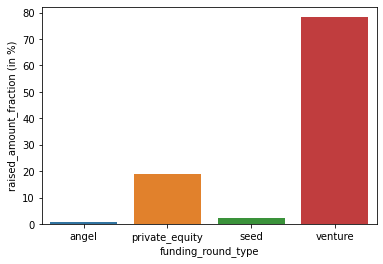

In [74]:
sns.barplot(x=df.index,y='raised_amount_fraction',data =df)
plt.ylabel('raised_amount_fraction (in %)')
plt.show()

### Plotting the median value of investment in each funding_round_type

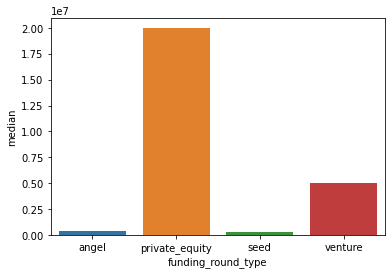

In [75]:
sns.barplot(x=df.index,y='median',data =df)
plt.show()

### Plotting based on the total raised_amount_usd in top 9 countries 
### (for venture type funding)

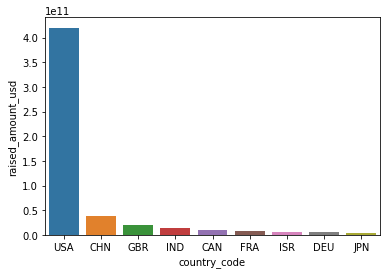

In [76]:
sns.barplot(x='country_code',y='raised_amount_usd',data =top9)
plt.show()

### Plotting the number of investments made in each sector for top 3 countries 
### (for venture type funding)

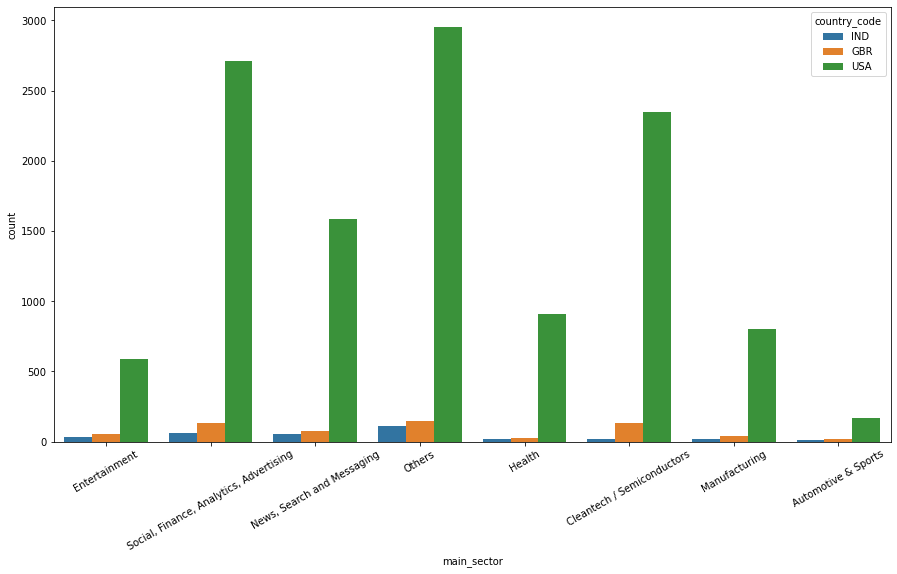

In [77]:
plt.figure(figsize=([15,8]))
p = sns.countplot(x='main_sector',hue='country_code',data = master_frame)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.show()

### Plotting the above graph with the number of investments made by top 3 countries in various sectors 
### (for venture type funding)
(the below representation enhaces the interpretations in comparison to the graph above)

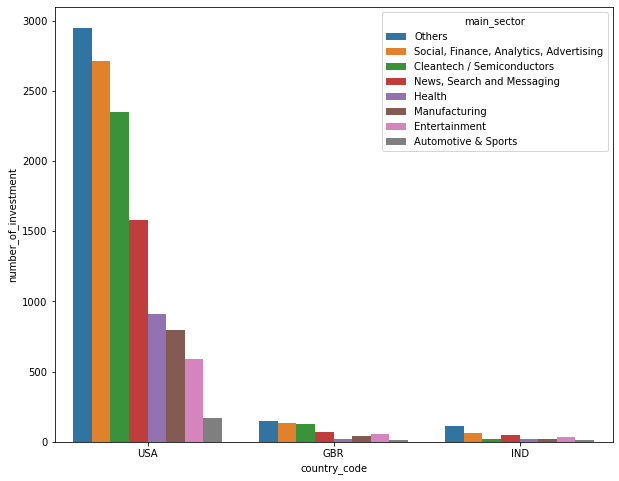

In [78]:
df = master_frame.groupby(['country_code','main_sector'],as_index = False)['raised_amount_usd'].agg('count').sort_values('raised_amount_usd',ascending=False)
df.rename(columns={'raised_amount_usd':'number_of_investment'},inplace = True)

plt.figure(figsize=([10,8]))
p = sns.barplot(x='country_code',y = 'number_of_investment',hue='main_sector',data = df)
plt.show()